<a href="https://colab.research.google.com/github/ajit-ai/DataScience/blob/main/Stock_Price_Prediction_Project_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('all_stocks_5yr.csv', delimiter=',', on_bad_lines='skip')
print(data.shape)
print(data.sample(7))

(130934, 7)
              date   open   high    low  close      volume  Name
6432    2013-08-26  34.83  34.90  34.52  34.52   3408959.0   ABT
103514  2013-08-22  89.28  90.85  89.13  90.60    767226.0    CB
115251  2016-11-15   5.65   6.13   5.64   6.05  66041198.0   CHK
110889  2017-12-05  70.06  70.53  69.79  70.09   1657530.0  CERN
7228    2016-10-21  40.41  40.61  40.16  40.50   7276420.0   ABT
106340  2014-11-11  40.82  40.83  40.40  40.63   3509920.0   CCL
95807   2018-01-12  36.82  36.86  36.55  36.71   1934894.0   CAG


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130934 entries, 0 to 130933
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    130934 non-null  object 
 1   open    130933 non-null  float64
 2   high    130933 non-null  float64
 3   low     130933 non-null  float64
 4   close   130933 non-null  float64
 5   volume  130933 non-null  float64
 6   Name    130933 non-null  object 
dtypes: float64(5), object(2)
memory usage: 7.0+ MB


In [4]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130934 entries, 0 to 130933
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    130934 non-null  datetime64[ns]
 1   open    130933 non-null  float64       
 2   high    130933 non-null  float64       
 3   low     130933 non-null  float64       
 4   close   130933 non-null  float64       
 5   volume  130933 non-null  float64       
 6   Name    130933 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 7.0+ MB


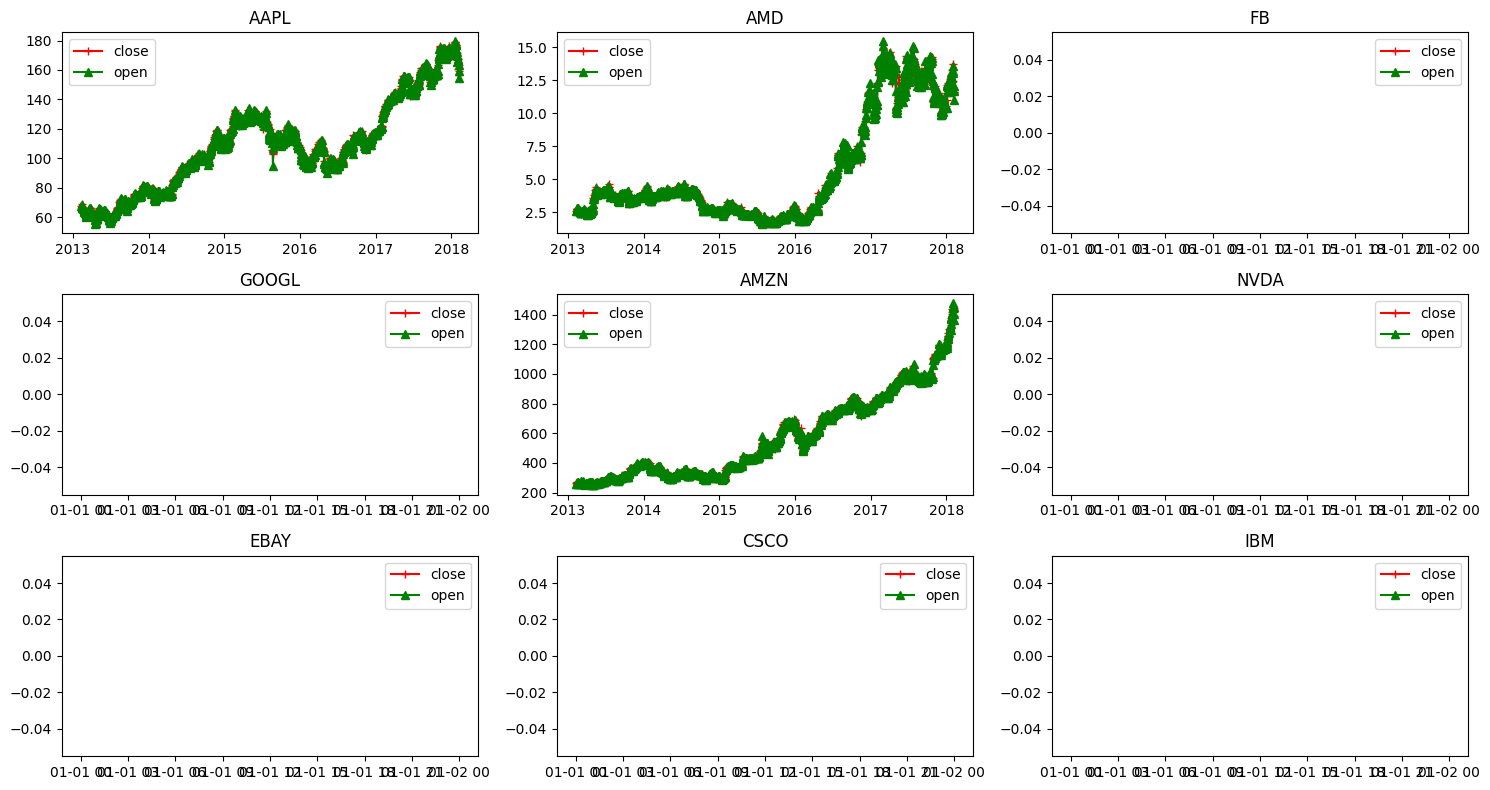

In [5]:
data['date'] = pd.to_datetime(data['date'])
# date vs open
# date vs close

# Define the list of companies you want to plot
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']

plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
	plt.subplot(3, 3, index)
	c = data[data['Name'] == company]
	plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
	plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
	plt.title(company)
	plt.legend()
	plt.tight_layout()

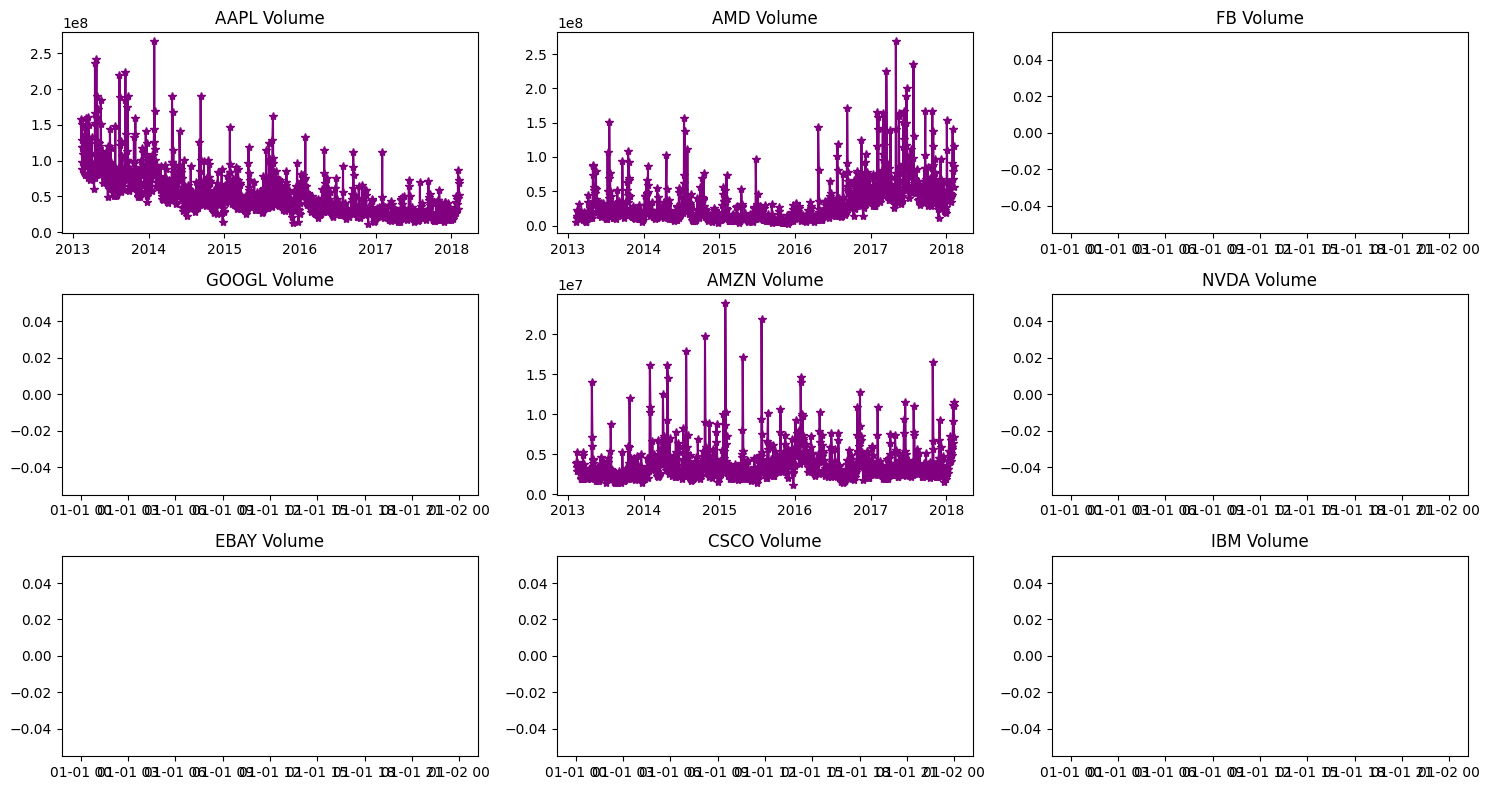

In [6]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
	plt.subplot(3, 3, index)
	c = data[data['Name'] == company]
	plt.plot(c['date'], c['volume'], c='purple', marker='*')
	plt.title(f"{company} Volume")
	plt.tight_layout()

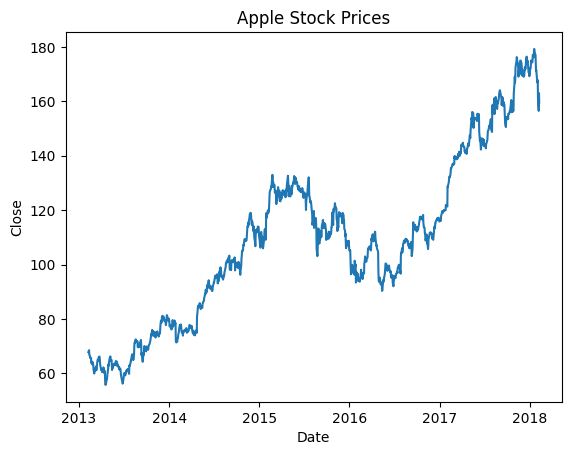

In [7]:
apple = data[data['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
& (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

In [8]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [11]:
model.compile(optimizer='adam',
			loss='mean_squared_error')
history = model.fit(x_train,
					y_train,
					epochs=10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0683
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0092
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0096
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0102
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0070
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0081
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0076
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0057
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0062
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0055


In [12]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step
MSE 19.36654946795838
RMSE 4.400744194787784


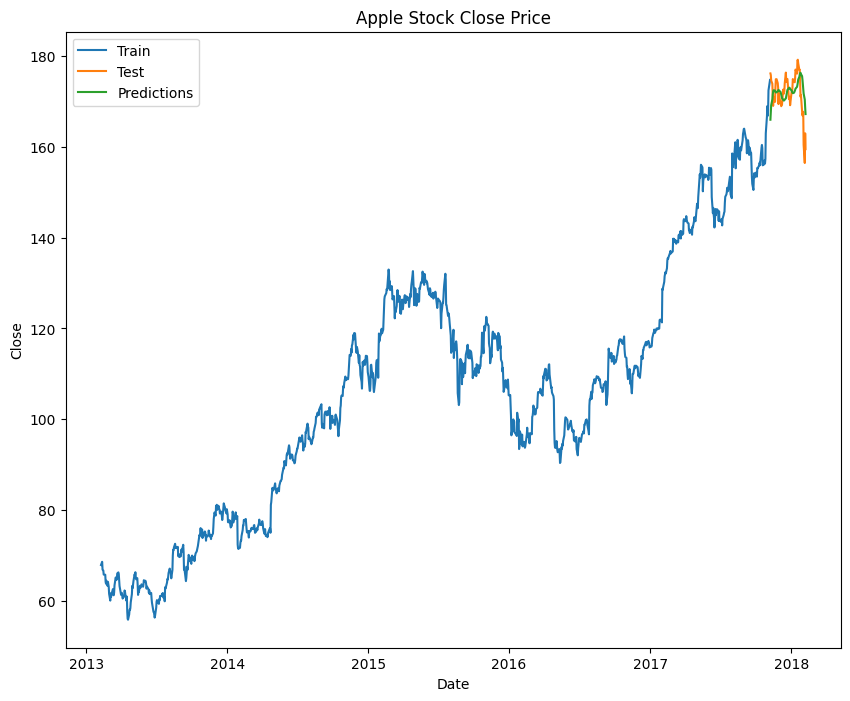

In [13]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])